# Autocorrelation
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 10/27/2021          |
| Updated | 10/20/2022          |

## **Figure 4.**

Π = 0.05
	maxR_p = 56124.2
	maxR_g = 65536.7
Π = 0.05
	maxR_p = 56124.2
	maxR_g = 65536.7
Π = 0.10
	maxR_p = 10536.8
	maxR_g = 65538.1
Π = 0.10
	maxR_p = 10536.8
	maxR_g = 65538.1


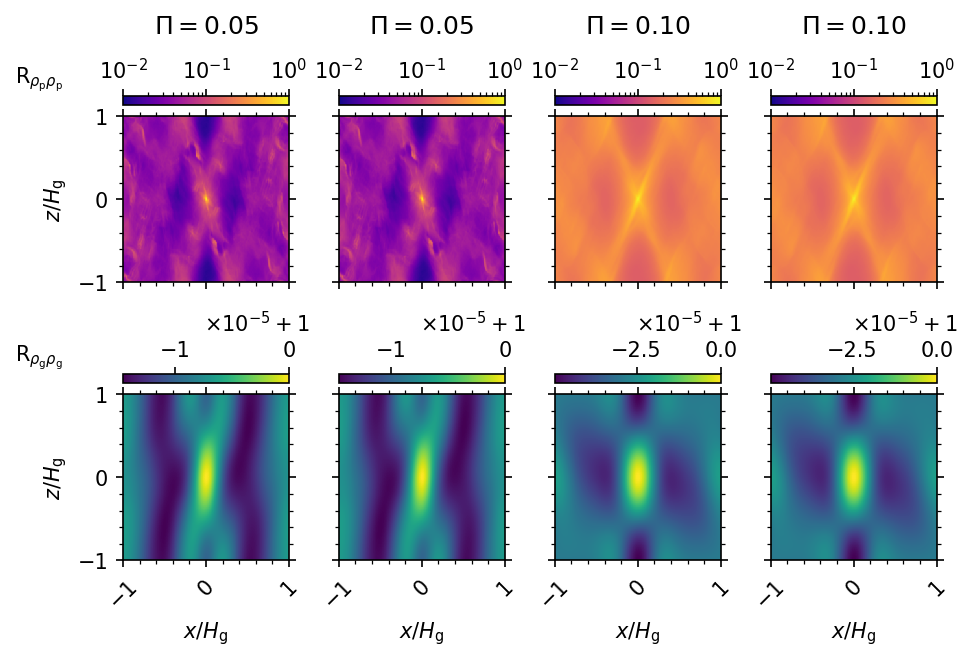

In [1]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np
from scipy import fftpack

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(7, 4.5), dpi=150)
workdir = '../unstrat'
case = 'BA'
Pis = ['0.05', '0.05', '0.10', '0.10']
res = '256'
# vmin_p, vmax_p = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    t = data['Time']
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    print(f'Π = {Pi}')
    print(f'\tmaxR_p = {ac[0][0]:.1f}')
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    rhops = axs[0][i].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin=1e-2), cmap='plasma')
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    print(f'\tmaxR_g = {ac[0][0]:.1f}')
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    fix = (shift-1)*1e5
    rhogs = axs[1][i].pcolormesh(xf, zf, fix)

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'$\Pi={Pi:s}$', pad=40)
    axs[0][i].set(aspect='equal')

    # Add and format gas color bars
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')
    axs[1][i].text(0.49, 1.51, r'$\times10^{-5}+1$',
               ha='left', va='top', transform=axs[1][i].transAxes)

for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.65, 1.31, r'$\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.65, 1.31, r'$\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
# plt.savefig(f'figs/{case}_snaps.png', dpi=1000, bbox_inches='tight', pad_inches=0.01)
plt.subplots_adjust(wspace=0.3)
plt.show()

## **Figure 6.**

Index of shifted max: (128, 128)
Index of shifted max: (128, 128)
Index of shifted max: (128, 128)
Index of shifted max: (128, 128)


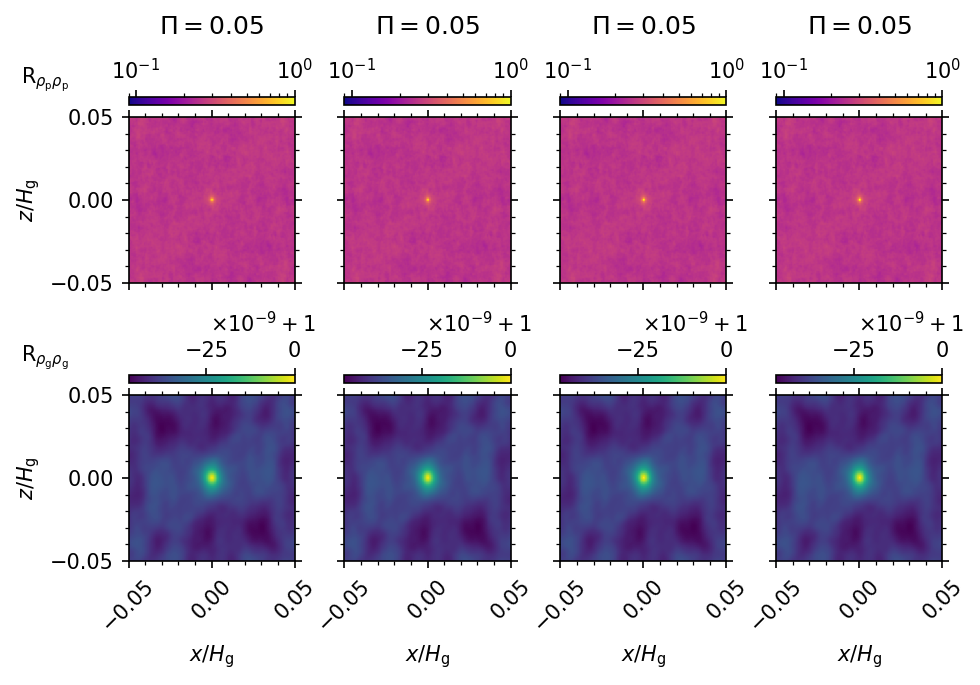

In [48]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
from scipy import fftpack

fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(7, 4.5), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = ['0.05', '0.05', '0.05', '0.05']
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H_g = c_s/Omega
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xf, zf = data['x1f']/H_g, data['x2f']/H_g
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    flat_i = np.argmax(ac)
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    flat_i = np.argmax(shift)
    print(f'Index of shifted max: {np.unravel_index((flat_i), (res, res))}')
    rhops = axs[0][i].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin=0.09),
                                 cmap='plasma')
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e9
    rhogs = axs[1][i].pcolormesh(xf, zf, offset)

    # Add and format dust color bars, titles, and x-axis labels
    cb_rhop = fig.colorbar(rhops, ax=axs[0][i], location='top')
    axs[0][i].set_title(f'$\Pi={float(Pi)}$', pad=40)
    axs[0][i].set(aspect='equal')
    axs[1][i].set(xlabel=r'$x/H_\mathrm{g}$', aspect='equal')

    # Add and format gas color bars
    cb_rhog = fig.colorbar(rhogs, ax=axs[1][i], location='top')
    axs[1][i].text(0.49, 1.51, r'$\times10^{-9}+1$',
               ha='left', va='top', transform=axs[1][i].transAxes)
for ax in axs.flat:
    ax.label_outer()
    ax.minorticks_on()
    ax.set(aspect='equal')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.tick_params(axis='x', labelrotation=45)

# Format and save figure
axs[0][0].text(-0.65, 1.31,
               r'$\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}$',
               ha='left', va='top', transform=axs[0][0].transAxes)
axs[1][0].text(-0.65, 1.31,
               r'$\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}$',
               ha='left', va='top', transform=axs[1][0].transAxes)
axs[0][0].set(ylabel=r'$z/H_\mathrm{g}$')
axs[1][0].set(ylabel=r'$z/H_\mathrm{g}$')
plt.subplots_adjust(wspace=0.3)
# plt.savefig(f'figs/{case}_autocorrelations.png', dpi=1000,
#             bbox_inches='tight', pad_inches=0.01)
plt.show()

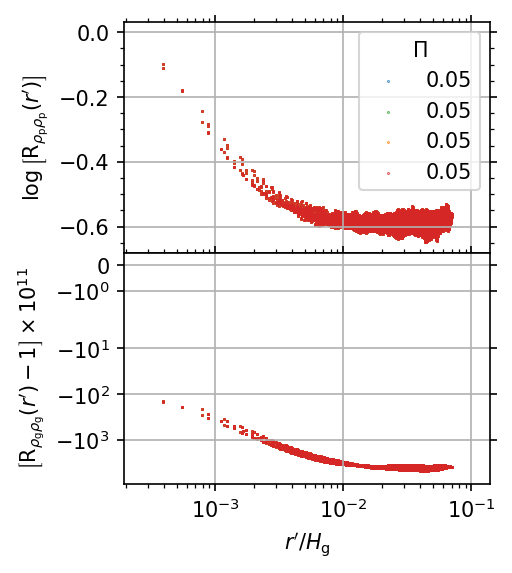

In [49]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

fig, axs = plt.subplots(2, sharex=True, figsize=(3.15, 4), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters and plot densities
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    # etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    left, right = xv[-1]/res, np.sqrt(8)*xv[-1]
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole)
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift)
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift - 1)*1e11

    axs[0].scatter(rv, log, s=0.1, color=Pi[1], label=Pi[0])
    axs[1].scatter(rv, offset, s=0.1, color=Pi[1])
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(loc='upper right', title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left[\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}(r^\prime)\right]$')
axs[1].set(xlim=(left, right), ylim=(-9e3, 0.5), xscale='log', yscale='symlog',
           xlabel=r'$r^\prime/H_\mathrm{g}$',
           ylabel=r'$\left[\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}(r^\prime)-1\right]\times10^{11}$')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_pow-spect.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

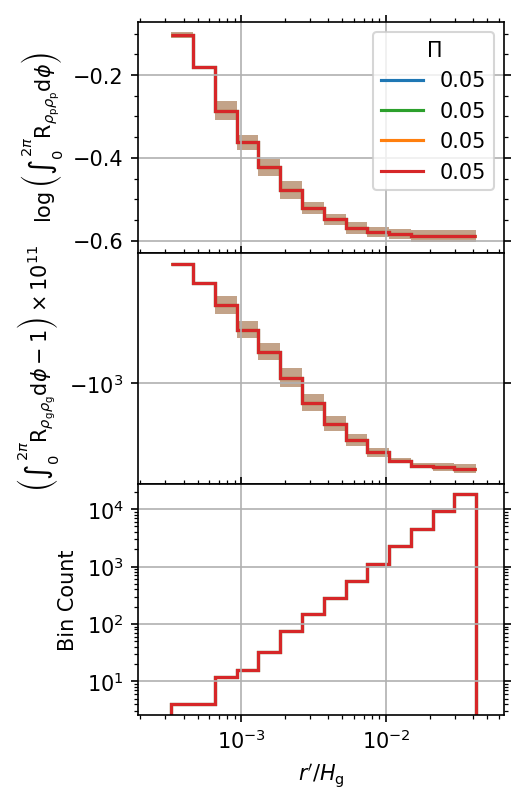

In [186]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

fig, axs = plt.subplots(3, sharex=True, figsize=(3.15, 6), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    # etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    left, right = xv[-1]/res, 1.32*xv[-1]
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole).ravel()
    indices = np.where(rv > xv[-1])[0]
    indices = np.append(indices, np.where(rv == 0)[0])
    rv = np.delete(rv, indices)
    r0 = xv[x0]
    base = np.sqrt(2)
    leftmost_edge = r0/np.sqrt(base)
    num = int(np.sqrt(res))
    bin_edges = leftmost_edge*np.logspace(0, num, num=(num + 1), base=base)
    # Process dust
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift).ravel()
    log = np.delete(log, indices)
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='mean', bins=bin_edges)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='std', bins=bin_edges)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds
    # Process gas
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift.ravel() - 1)*1e11
    offset = np.delete(offset, indices)
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='mean', bins=bin_edges)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='std', bins=bin_edges)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        rv.ravel(), statistic='count', bins=bin_edges)

    axs[0].stairs(dust_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5, label=Pi[0])
    axs[0].stairs(dust_highs, bin_edges, baseline=dust_lows, fill=True,
                color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5)
    axs[1].stairs(gas_highs, bin_edges, baseline=gas_lows, fill=True,
                  color=Pi[1], alpha=0.2)
    axs[2].stairs(bin_counts, bin_edges, color=Pi[1], lw=1.5)
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}\mathrm{d}\phi\right)$')
axs[1].set(yscale='symlog',
           ylabel=r'$\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}\mathrm{d}\phi-1\right)\times10^{11}$')
axs[2].set(xlim=(left, right), xscale='log', yscale='log',
           xlabel=r'$r^\prime/H_\mathrm{g}$', ylabel=r'Bin Count')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)


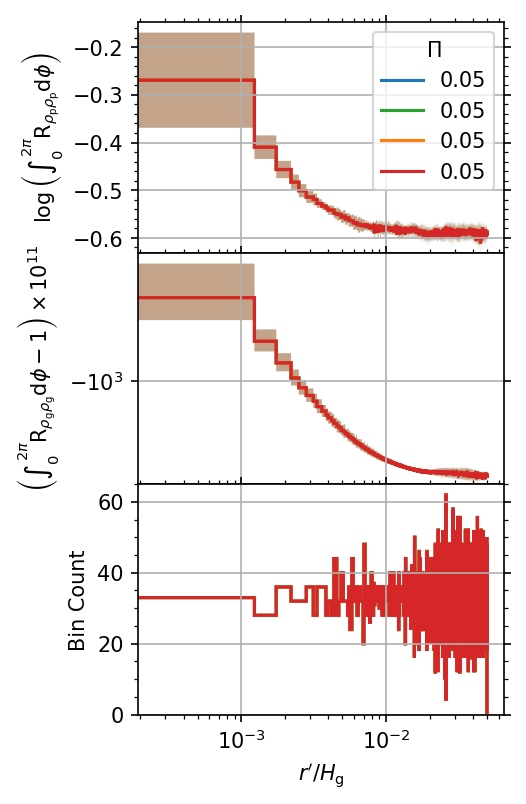

In [ ]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack, stats

def norms(xv, zv, pole):
    rv = np.zeros((len(zv), len(xv)))
    for i, z in enumerate(zv):
        for j, x in enumerate(xv):
            rv[i][j] = np.sqrt((x - pole[0])**2 + (z - pole[1])**2)
    return rv

def equal_count_bin_edges(data, nbin):
    """
    https://www.statology.org/equal-frequency-binning-python/
    """
    nlen = len(data)
    x = np.linspace(0, nlen, nbin + 1)
    xp = np.arange(nlen)
    fp = np.sort(data)
    return np.interp(x, xp, fp)

fig, axs = plt.subplots(3, sharex=True, figsize=(3.15, 6), dpi=150)
workdir = '../unstrat'
case = 'AB'
Pis = [['0.05', 'tab:blue'], ['0.05', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.05', 'tab:red']]
res = 256

for i, Pi in enumerate(Pis):
    # Collect parameters
    # print(f'{case}/{Pi[0]}: Processing...', flush=True)
    path = f'{workdir}/{case}/{Pi[0]}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    # etar = float(Pi[0])*c_s
    data = athena_read.athdf(f'{path}/athdf/SI.out1.00100.athdf')
    xv, zv = data['x1v'], data['x2v']
    left, right = xv[-1]/res, 1.32*xv[-1]
    x0, z0 = int(len(xv)/2), int(len(zv)/2)
    pole = (xv[x0], zv[z0])
    rv = norms(xv, zv, pole).ravel()
    indices = np.where(rv > xv[-1])[0]
    rv = np.delete(rv, indices)
    bin_count = 33
    bin_edges = equal_count_bin_edges(rv, int(len(rv)/bin_count))
    # Process dust
    ft = fftpack.fft2(data['rhop'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    log = np.log10(shift).ravel()
    log = np.delete(log, indices)
    dust_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='mean', bins=bin_edges)
    dust_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        log.ravel(), statistic='std', bins=bin_edges)
    dust_highs = dust_means + dust_stds
    dust_lows = dust_means - dust_stds
    # Process gas
    ft = fftpack.fft2(data['rho'][0])
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real
    norm = ac/ac[0][0]
    shift = fftpack.fftshift(norm)
    offset = (shift.ravel() - 1)*1e11
    offset = np.delete(offset, indices)
    gas_means, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='mean', bins=bin_edges)
    gas_stds, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        offset.ravel(), statistic='std', bins=bin_edges)
    gas_highs = gas_means + gas_stds
    gas_lows = gas_means - gas_stds
    bin_counts, bin_edges, binnumnber = stats.binned_statistic(rv.ravel(),
        rv.ravel(), statistic='count', bins=bin_edges)

    axs[0].stairs(dust_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5, label=Pi[0])
    axs[0].stairs(dust_highs, bin_edges, baseline=dust_lows, fill=True,
                color=Pi[1], alpha=0.2)
    axs[1].stairs(gas_means, bin_edges, baseline=float('-inf'),
                  color=Pi[1], lw=1.5)
    axs[1].stairs(gas_highs, bin_edges, baseline=gas_lows, fill=True,
                  color=Pi[1], alpha=0.2)
    axs[2].stairs(bin_counts, bin_edges, color=Pi[1], lw=1.5)
    # print(f'\tdone.', flush=True)

for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

# Format and save figure
axs[0].legend(title=r'$\Pi$')
axs[0].set(ylabel=r'$\log\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{p}\rho_\mathrm{p}}\mathrm{d}\phi\right)$')
axs[1].set(yscale='symlog',
           ylabel=r'$\left(\int_0^{2\pi}\mathrm{R}_{\rho_\mathrm{g}\rho_\mathrm{g}}\mathrm{d}\phi-1\right)\times10^{11}$')
axs[2].set(xlim=(left, right), xscale='log', xlabel=r'$r^\prime/H_\mathrm{g}$',
           ylabel=r'Bin Count')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'figs/{case}_Rs_rad-prof.pdf', bbox_inches='tight', pad_inches=0.01)
